**KNN实现手写数字识别**

-----------------------

# 1 - 导入模块

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import  Image
from ld_mnist import load_digits

%matplotlib inline

# 2 - 导入数据及数据预处理

In [3]:
mnist = load_digits()

Extracting C:/Users/marsggbo/Documents/Code/ML/TF Tutorial/data/MNIST_data\train-images-idx3-ubyte.gz
Extracting C:/Users/marsggbo/Documents/Code/ML/TF Tutorial/data/MNIST_data\train-labels-idx1-ubyte.gz
Extracting C:/Users/marsggbo/Documents/Code/ML/TF Tutorial/data/MNIST_data\t10k-images-idx3-ubyte.gz
Extracting C:/Users/marsggbo/Documents/Code/ML/TF Tutorial/data/MNIST_data\t10k-labels-idx1-ubyte.gz


数据维度

In [4]:
print("Train: "+ str(mnist.train.images.shape))
print("Train: "+ str(mnist.train.labels.shape))
print("Test: "+ str(mnist.test.images.shape))
print("Test: "+ str(mnist.test.labels.shape))

Train: (55000, 784)
Train: (55000, 10)
Test: (10000, 784)
Test: (10000, 10)


mnist数据采用的是TensorFlow的一个函数进行读取的，由上面的结果可以知道训练集数据X_train有55000个，每个X的数据长度是784（28*28）。

In [5]:
x_train, y_train, x_test, y_test = mnist.train.images, mnist.train.labels, mnist.test.images, mnist.test.labels

展示手写数字

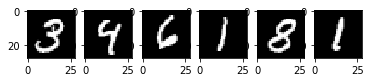

In [6]:
nums = 6
for i in range(1,nums+1):
    plt.subplot(1,nums,i)
    plt.imshow(x_train[i].reshape(28,28), cmap="gray")

# 3 - 构建模型

In [165]:
class Knn():
    
    def __init__(self,k):
        self.k = k
        self.distance = {}
        
    
    def topKDistance(self, x_train, x_test):
        '''
        计算距离，这里采用欧氏距离
        '''    
        print("计算距离...")
        distance = {}
        for i in range(x_test.shape[0]):
            dis1 = x_train - x_test[i]
            dis2 = np.sqrt(np.sum(dis1*dis1, axis=1))
            distance[str(i)] = np.argsort(dis2)[:self.k]
            if i%1000==0:
                print(distance[str(i)])
        return distance
    
    def predict(self, x_train, y_train, x_test):
        '''
        预测
        '''
        self.distance = self.topKDistance(x_train, x_test)
        y_hat = []
        print("选出每项最佳预测结果")
        for i in range(x_test.shape[0]):
            classes = {}
            for j in range(self.k):
                num = np.argmax(y_train[self.distance[str(i)][j]])
                classes[num] = classes.get(num, 0) + 1
            sortClasses = sorted(classes.items(), key= lambda x:x[1], reverse=True)
            y_hat.append(sortClasses[0][0])
        y_hat = np.array(y_hat).reshape(-1,1)
        return y_hat

    def fit(self, x_train, y_train, x_test, y_test):
        '''
        计算准确率
        '''
        print("预测...")
        y_hat = self.predict(x_train, y_train, x_test)
#         index_hat  =np.argmax(y_hat , axis=1)
        print("计算准确率...")
        index_test = np.argmax(y_test, axis=1).reshape(1,-1)
        accuracy = np.sum(y_hat.reshape(index_test.shape) == index_test)*1.0/y_test.shape[0]
        return accuracy, y_hat

In [167]:
clf = Knn(10)
accuracy, y_hat = clf.fit(x_train,y_train,x_test,y_test)
print(accuracy)

预测...
计算距离...
[48843 33620 11186 22059 42003  9563 39566 10260 35368 31395]
[54214  4002 11005 15264 49069  8791 38147 47304 51494 11053]
[46624 10708 22134 20108 48606 19774  7855 43740 51345  9308]
[ 8758 47844 50994 45610  1930  3312 30140 17618   910 51918]
[14953  1156 50024 26833 26006 38112 31080  9066 32112 41846]
[45824 14234 48282 28432 50966 22786 40902 52264 38552 44080]
[24878  4655 20258 36065 30755 15075 35584 12152  4683 43255]
[48891 20744 47822 53511 54545 27392 10240  3970 25721 30357]
[  673 17747 33803 20960 25463 35723   969 50577 36714 35719]
[ 8255 42067 53282 14383 14073 52083  7233  8199  8963 12617]
选出每项最佳预测结果
计算准确率...
0.9672


准确率略高。